# Customer Retention Analysis in Looker E-Commerce 

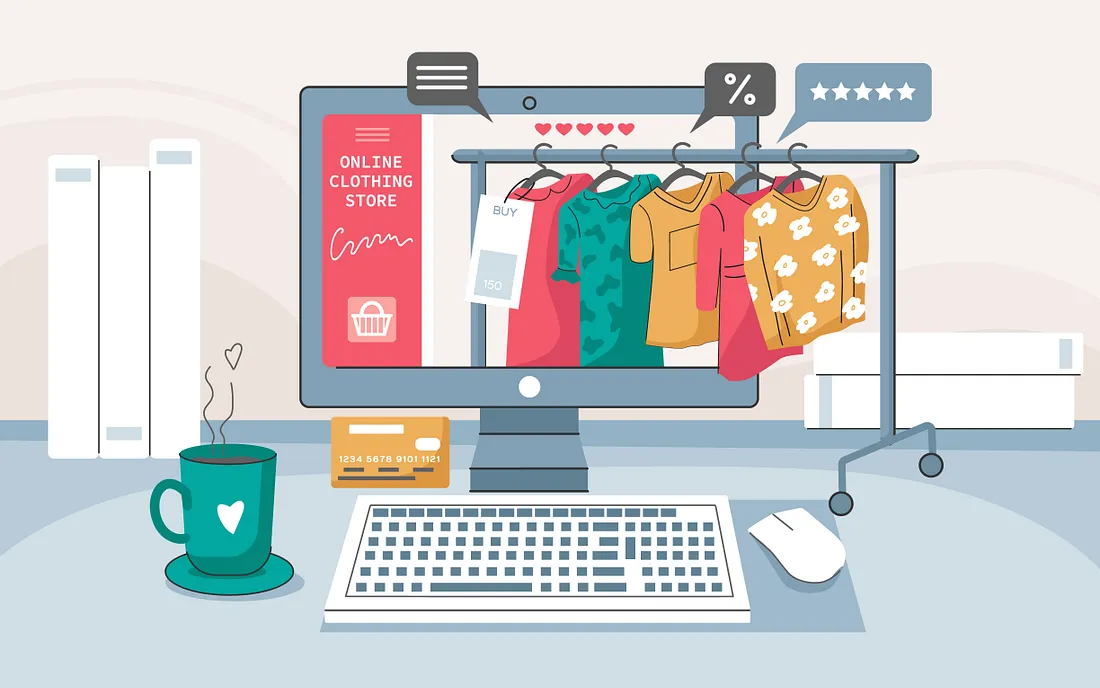

**In the e-commerce industry, retaining customers is just as important — if not more important — than acquiring new ones. Cohort Retention Analysis is an effective way to understand customer behavior over time.**

**By grouping customers based on the time of their first purchase (cohorts), we can track how likely they are to return and make repeat purchases in subsequent periods.**

### Stakeholder
**Tim Manajemen Bisnis & Tim Marketing**
`- Business Management Team: Defines strategic goals and ensures alignment with business objectives.`
`- Marketing Team: Uses insights to refine campaign strategies and improve customer engagement.`

### Problem Statement
To analyze customer loyalty across cohorts to understand how buying behaviour evolves over time. By identifying trends in repeat purchases, we aim to uncover opportunities to improve customer retention, increase customer lifetime value (CLV), and reduce churn.

### Goal
1. Understand customer retention and churn rates within each cohort period 
2. Analyze sales trends based on orders across different cohort periods
3. Identify customer segments that tend to be more active and loyal
4. Develop more effective customer retention strategies based on insights from the cohort analysis

In [1]:
# Import Modul (Library)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',100)

In [2]:
# Load Dataset
users = pd.read_csv('users.csv')
order = pd.read_csv('order_items.csv')
products = pd.read_csv('inventory_items.csv') 

# Menggabungkan dataset Users, Order Items, dan Inventory Items
df = order.merge(users, left_on='user_id', right_on='id')
df = df.merge(products, left_on='product_id', right_on='id')

# Merubah tipe data pada kolom created_at
df['created_at_x'] = pd.to_datetime(df['created_at_x'], format='ISO8601')

# Filter kolom yang dibutuhkan
df = df[['order_id',
         'user_id', 
         'first_name', 
         'last_name', 
         'age', 
         'gender', 
         'country', 
         'product_name', 
         'product_brand', 
         'sale_price', 
         'created_at_x', 
         'status']].rename(columns={'created_at_x':'created_at'})

# Filter untuk data yang statusnya complete
df = df[df['status'] == 'Complete']

# Filter waktu yang digunakan 
df['created_at'] = pd.to_datetime(df['created_at'], infer_datetime_format = True)
start =  pd.to_datetime('2019-01-01 00:00:00+00:00')
end =  pd.to_datetime('2019-06-30 23:59:59+00:00')

df=df[~df['created_at'].between(start, end)] 

start =  pd.to_datetime('2024-01-01 00:00:00+00:00')
end =  pd.to_datetime('2024-01-29 23:59:59+00:00')

df = df[~df['created_at'].between(start, end)] 


df.dropna(inplace=True)
df.sort_values('created_at')

,order_id,user_id,first_name,last_name,age,gender,country,product_name,product_brand,sale_price,created_at,status
156561,98720,78767,Thomas,Cooley,17,M,United States,Southern Belle Bridal Hoop Skirt Wedding Slip,Merry Modes,100.000000,2019-07-01 07:53:12+00:00,Complete
102391,103558,82692,Lisa,Woods,23,F,United States,Teez-Her The Skinny Pants - Short length,Teez-Her,45.990002,2019-07-01 16:21:16+00:00,Complete
157988,99708,79612,Benjamin,Roman,28,M,United States,Canyon Ridge Big & Tall Elastic-Waist Twill Sh...,Canyon Ridge,106.959999,2019-07-01 21:44:58+00:00,Complete
166180,99708,79612,Benjamin,Roman,28,M,United States,La Blanca Women's Encore Event OTS Sweetheart ...,La Blanca,138.000000,2019-07-01 23:03:05+00:00,Complete
155929,108141,86403,Ricky,Garcia,39,M,China,Columbia Men's Big Ascender Ii Softshell Jacket,Columbia,99.989998,2019-07-02 11:24:48+00:00,Complete
...,...,...,...,...,...,...,...,...,...,...,...,...
16386,117928,94214,Douglas,Adams,69,M,China,Allegra K Ladies Single Button Closure Front P...,Allegra K,13.000000,2023-12-31 23:08:22+00:00,Complete
135453,58300,46603,Derrick,Robinson,40,M,United States,C-IN2 Men's Pop Color Deep V-Neck Tee,C-IN2,69.500000,2023-12-31 23:42:14+00:00,Complete
8255,25858,20630,Norma,Johnson,39,F,Japan,Only Hearts Women's Double Knit Legging,Only Hearts,10.000000,2023-12-31 23:44:15+00:00,Complete
57919,72167,57645,Antonio,Kemp,59,M,United States,Thorlo Men's Everyday Outdoor Sock with CoolMax,Thorlo,26.990000,2023-12-31 23:52:23+00:00,Complete


In [3]:
#step 1
#define cohort period
# Ambil tanggal cohort (tanggal pertama setiap user)
cek = df.copy()
cek['cohort_month'] = cek.groupby('user_id')['created_at'].transform('min').dt.to_period('M')
cek

,order_id,user_id,first_name,last_name,age,gender,country,product_name,product_brand,sale_price,created_at,status,cohort_month
1,28204,22551,Terri,Alvarez,35,F,China,7 For All Mankind Men's Austyn Relaxed Straigh...,7 For All Mankind,0.02,2023-03-14 03:47:21+00:00,Complete,2023-03
2,35223,28215,Rebecca,Mcgee,49,F,United States,7 For All Mankind Men's Austyn Relaxed Straigh...,7 For All Mankind,0.02,2023-12-05 13:25:30+00:00,Complete,2023-12
6,46269,37023,Sherry,Price,46,F,Brasil,Fox Men's Hacker Thermal Tee,Fox,0.49,2021-10-31 01:26:46+00:00,Complete,2021-10
7,80002,63821,Bonnie,George,68,F,Brasil,Fox Men's Hacker Thermal Tee,Fox,0.49,2022-04-01 13:25:52+00:00,Complete,2022-03
12,37750,30232,Robert,Green,12,M,Brasil,Affliction-Women Bootcut Jeans Jade Reworx Los...,Affliction,1.50,2023-02-27 02:31:30+00:00,Complete,2023-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181637,124384,99342,Pamela,Diaz,33,F,Brasil,Big Mens Elastic Insert Casual Pant by Corners...,Bigmansland,903.00,2023-08-04 07:18:00+00:00,Complete,2023-08
181741,6722,5365,Joseph,Newton,14,M,South Korea,MontBell Ultralight Down Parka - Men's,MontBell,990.00,2023-11-11 10:34:38+00:00,Complete,2023-09
181749,25610,20434,Duane,Skinner,27,M,France,Original Penguin Men's Mearl Short Sleeve Polo,Original Penguin,999.00,2023-06-15 11:58:18+00:00,Complete,2023-06
181750,27087,21671,Christian,Jones,33,M,China,Original Penguin Men's Mearl Short Sleeve Polo,Original Penguin,999.00,2023-10-16 06:50:15+00:00,Complete,2023-10


In [4]:
#step 2
#define current transaction period
cek['current_transaction_month'] = cek['created_at'].dt.to_period('M') #define current_period
cek = cek[['user_id','cohort_month','current_transaction_month']]
cek.drop_duplicates(inplace=True) #drop duplikat
cek.sort_values(by='user_id')

,user_id,cohort_month,current_transaction_month
39779,2,2022-02,2022-02
123347,3,2023-04,2023-04
168061,4,2022-10,2022-10
130815,17,2020-10,2020-10
49097,18,2023-07,2023-07
...,...,...,...
117629,99969,2023-08,2023-08
64119,99969,2023-08,2023-11
101164,99980,2022-03,2022-03
15721,99983,2023-08,2023-08


In [5]:
#step 3
# hitung period distance
cek['period_distance'] =  cek['current_transaction_month'].dt.month-cek['cohort_month'].dt.month
cek

,user_id,cohort_month,current_transaction_month,period_distance
1,22551,2023-03,2023-03,0
2,28215,2023-12,2023-12,0
6,37023,2021-10,2021-10,0
7,63821,2022-03,2022-04,1
12,30232,2023-02,2023-02,0
...,...,...,...,...
181634,92737,2022-11,2022-11,0
181635,92908,2023-07,2023-07,0
181637,99342,2023-08,2023-08,0
181749,20434,2023-06,2023-06,0


In [6]:
# drop period distance = 0
cek = cek[cek['period_distance']!=0]
cek

,user_id,cohort_month,current_transaction_month,period_distance
7,63821,2022-03,2022-04,1
53,99896,2020-11,2023-01,-10
113,18500,2023-01,2023-04,3
123,53946,2021-09,2022-04,-5
184,66642,2020-09,2022-05,-4
...,...,...,...,...
181604,12857,2022-01,2022-11,10
181609,30222,2019-07,2020-05,-2
181615,43413,2023-11,2023-12,1
181621,62346,2021-05,2023-08,3


In [7]:
# define distance between trx 1 to trx 2
cek['period_distance_first_second_trx'] = cek.groupby('user_id')['period_distance'].transform('min')
cek

,user_id,cohort_month,current_transaction_month,period_distance,period_distance_first_second_trx
7,63821,2022-03,2022-04,1,1
53,99896,2020-11,2023-01,-10,-10
113,18500,2023-01,2023-04,3,3
123,53946,2021-09,2022-04,-5,-5
184,66642,2020-09,2022-05,-4,-4
...,...,...,...,...,...
181604,12857,2022-01,2022-11,10,10
181609,30222,2019-07,2020-05,-2,-2
181615,43413,2023-11,2023-12,1,1
181621,62346,2021-05,2023-08,3,3


In [8]:
## panggil kolom customer_id, period_distance_first_second_trx
cek = cek[['user_id','period_distance_first_second_trx']]
cek = cek.drop_duplicates()
cek.describe()

,user_id,period_distance_first_second_trx
count,3088.000000,3088.000000
mean,49929.906736,0.813795
std,28482.944104,4.549833
min,43.000000,-11.000000
25%,25219.750000,-2.000000
50%,50177.000000,1.000000
75%,74496.500000,4.000000
max,99969.000000,11.000000


<Axes: xlabel='period_distance_first_second_trx', ylabel='Count'>

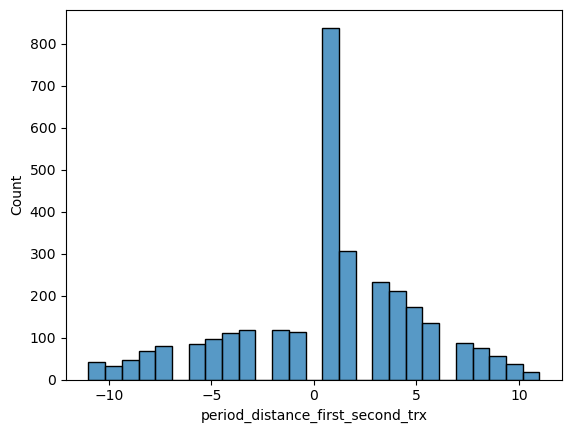

In [9]:
sns.histplot(cek['period_distance_first_second_trx'])

### Cohort Analysis => Data Preprocessing

Untuk membuat Cohort Retention analysis, kita harus mengubah data mentah menjadi:

| cohort_semester | current_semester | count_user | semester_distances | total_users | retention_rate

1. cohort_semester
2. current_semester
3. count_user
4. semester_distance
5. total_users
6. retention_rate

In [10]:
# Fungsi untuk menentukan semester berdasarkan transaksi pertama
def get_cohort_semester(date):
    year = date.year
    month = date.month
    semester = 1 if month <= 6 else 2
    return f"{year}-S{semester}"

# transaksi pertama setiap user
df['cohort_date'] = df.groupby('user_id')['created_at'].transform('min')

df['cohort_semester'] = df['cohort_date'].apply(get_cohort_semester)
df

,order_id,user_id,first_name,last_name,age,gender,country,product_name,product_brand,sale_price,created_at,status,cohort_date,cohort_semester
1,28204,22551,Terri,Alvarez,35,F,China,7 For All Mankind Men's Austyn Relaxed Straigh...,7 For All Mankind,0.02,2023-03-14 03:47:21+00:00,Complete,2023-03-14 03:47:21+00:00,2023-S1
2,35223,28215,Rebecca,Mcgee,49,F,United States,7 For All Mankind Men's Austyn Relaxed Straigh...,7 For All Mankind,0.02,2023-12-05 13:25:30+00:00,Complete,2023-12-04 12:42:42+00:00,2023-S2
6,46269,37023,Sherry,Price,46,F,Brasil,Fox Men's Hacker Thermal Tee,Fox,0.49,2021-10-31 01:26:46+00:00,Complete,2021-10-31 01:26:46+00:00,2021-S2
7,80002,63821,Bonnie,George,68,F,Brasil,Fox Men's Hacker Thermal Tee,Fox,0.49,2022-04-01 13:25:52+00:00,Complete,2022-03-29 16:27:36+00:00,2022-S1
12,37750,30232,Robert,Green,12,M,Brasil,Affliction-Women Bootcut Jeans Jade Reworx Los...,Affliction,1.50,2023-02-27 02:31:30+00:00,Complete,2023-02-27 02:31:30+00:00,2023-S1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181637,124384,99342,Pamela,Diaz,33,F,Brasil,Big Mens Elastic Insert Casual Pant by Corners...,Bigmansland,903.00,2023-08-04 07:18:00+00:00,Complete,2023-08-04 07:18:00+00:00,2023-S2
181741,6722,5365,Joseph,Newton,14,M,South Korea,MontBell Ultralight Down Parka - Men's,MontBell,990.00,2023-11-11 10:34:38+00:00,Complete,2023-09-20 11:00:47+00:00,2023-S2
181749,25610,20434,Duane,Skinner,27,M,France,Original Penguin Men's Mearl Short Sleeve Polo,Original Penguin,999.00,2023-06-15 11:58:18+00:00,Complete,2023-06-15 11:58:18+00:00,2023-S1
181750,27087,21671,Christian,Jones,33,M,China,Original Penguin Men's Mearl Short Sleeve Polo,Original Penguin,999.00,2023-10-16 06:50:15+00:00,Complete,2023-10-13 05:43:47+00:00,2023-S2


In [11]:
#step 2
# menentukan current semester 
def get_cohort_semester(date):
    year = date.year
    month = date.month
    semester = 1 if month <= 6 else 2
    return f"{year}-S{semester}"

df['current_semester'] = df['created_at'].apply(get_cohort_semester)

df.sort_values(by='cohort_semester')

,order_id,user_id,first_name,last_name,age,gender,country,product_name,product_brand,sale_price,created_at,status,cohort_date,cohort_semester,current_semester
169226,102742,82044,Steven,Wallace,33,M,Brasil,Devon & Jones D477 V-Neck Vest,Devon & Jones,150.000000,2019-12-13 14:24:30+00:00,Complete,2019-12-13 14:24:30+00:00,2019-S2,2019-S2
71006,14351,11495,Kristin,Johnson,64,F,China,Haggar Mens Cool 18 Gabardine Pleat Front Pant,Haggar,32.000000,2019-10-28 14:24:37+00:00,Complete,2019-10-28 14:24:37+00:00,2019-S2,2019-S2
96846,14351,11495,Kristin,Johnson,64,F,China,Not Your Daughter's Jeans Women's Petite Sheri...,Not Your Daughter's Jeans,43.470001,2019-10-31 12:28:56+00:00,Complete,2019-10-28 14:24:37+00:00,2019-S2,2019-S2
141396,52901,42385,David,Watson,37,M,United States,DKNYC Women's Open Front Sequin Shrug,DKNYC,76.989998,2019-12-26 12:53:46+00:00,Complete,2019-12-26 12:53:46+00:00,2019-S2,2019-S2
111651,25190,20082,Steven,Tyler,46,M,China,Scarf - Raw Silk,Red Blossom,50.000000,2021-04-29 12:01:01+00:00,Complete,2019-09-04 11:10:00+00:00,2019-S2,2021-S1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55729,92041,73390,Brandon,Nash,65,M,China,Jezebel Women's Desire Bustier,Jezebel,25.950001,2023-09-25 06:13:39+00:00,Complete,2023-09-25 04:05:30+00:00,2023-S2,2023-S2
120048,116329,92924,Anne,Butler,20,F,China,Armani Exchange J130 - Sateen Skinny Jean,A:X Armani Exchange,56.000000,2023-12-26 00:52:44+00:00,Complete,2023-12-21 23:41:52+00:00,2023-S2,2023-S2
93405,60666,48487,Gary,Griffith,29,M,United States,Hurley Juniors Yukon Zip Fleece Hoodie,Hurley,40.910000,2023-10-19 21:00:31+00:00,Complete,2023-10-19 21:00:31+00:00,2023-S2,2023-S2
55736,119251,95207,Sandra,Warren,52,F,United States,Swan Men's Fleece-Line Crew Neck Long Sleeves ...,Swan,25.950001,2023-09-17 06:52:05+00:00,Complete,2023-09-17 06:52:05+00:00,2023-S2,2023-S2


In [12]:
df.to_csv('Data Cohort Analysis.csv', index=False)

In [13]:
# step 3
# agregasi : count user
cohort_retention = df.groupby(['cohort_semester', 'current_semester'])['user_id'].count().reset_index().rename(columns={'user_id':'count_user'})
cohort_retention

,cohort_semester,current_semester,count_user
0,2019-S2,2019-S2,692
1,2019-S2,2020-S1,31
2,2019-S2,2020-S2,10
3,2019-S2,2021-S1,29
4,2019-S2,2021-S2,20
5,2019-S2,2022-S1,27
6,2019-S2,2022-S2,19
7,2019-S2,2023-S1,28
8,2019-S2,2023-S2,19
9,2020-S1,2020-S1,1298


In [14]:
# Pecah cohort dan current semester jadi tahun dan semester
cohort_retention[['cohort_year', 'cohort_s']] = cohort_retention['cohort_semester'].str.extract(r'(\d+)-S(\d+)').astype(int)
cohort_retention[['current_year', 'current_s']] = cohort_retention['current_semester'].str.extract(r'(\d+)-S(\d+)').astype(int)

# Hitung jarak dalam semester
cohort_retention['semester_distance'] = (cohort_retention['current_year'] - cohort_retention['cohort_year']) * 2 + \
                                         (cohort_retention['current_s'] - cohort_retention['cohort_s'])

cohort_retention.drop(columns=['cohort_year', 'cohort_s', 'current_year', 'current_s'], inplace=True)
cohort_retention

,cohort_semester,current_semester,count_user,semester_distance
0,2019-S2,2019-S2,692,0
1,2019-S2,2020-S1,31,1
2,2019-S2,2020-S2,10,2
3,2019-S2,2021-S1,29,3
4,2019-S2,2021-S2,20,4
5,2019-S2,2022-S1,27,5
6,2019-S2,2022-S2,19,6
7,2019-S2,2023-S1,28,7
8,2019-S2,2023-S2,19,8
9,2020-S1,2020-S1,1298,0


In [15]:
# Total user yang join (semester_distance == 0)
total_initial_users = cohort_retention[cohort_retention['semester_distance'] == 0]['count_user'].sum()

# Total user yang aktif kembali di semester berikutnya (semester_distance >= 1)
total_retained_users = cohort_retention[cohort_retention['semester_distance'] >= 1]['count_user'].sum()

# Hitung retention rate keseluruhan
overall_retention_rate = (total_retained_users / total_initial_users) * 100

print(f"Retention rate keseluruhan: {overall_retention_rate:.2f}%")

Retention rate keseluruhan: 9.19%


In [16]:
active_per_semester = cohort_retention.groupby('current_semester')['count_user'].sum()
print(f"Total user aktif per semester: {active_per_semester}")

total_active_customers = cohort_retention['count_user'].sum()
print(f"Total customer aktif (dari semua semester): {total_active_customers}")

Total user aktif per semester: current_semester
2019-S2      692
2020-S1     1329
2020-S2     1867
2021-S1     2701
2021-S2     3334
2022-S1     4501
2022-S2     6117
2023-S1     8220
2023-S2    13178
Name: count_user, dtype: int64
Total customer aktif (dari semua semester): 41939


In [17]:
cohort_totals = cohort_retention[cohort_retention['semester_distance'] == 0][['cohort_semester', 'count_user']]
cohort_totals.rename(columns={'count_user': 'total_users'}, inplace=True)

cohort_retention = pd.merge(cohort_retention, cohort_totals, on='cohort_semester', how='left')

# Hitung retention rate
cohort_retention['retention_rate'] = (cohort_retention['count_user'] / cohort_retention['total_users']) * 100
cohort_retention

,cohort_semester,current_semester,count_user,semester_distance,total_users,retention_rate
0,2019-S2,2019-S2,692,0,692,100.000000
1,2019-S2,2020-S1,31,1,692,4.479769
2,2019-S2,2020-S2,10,2,692,1.445087
3,2019-S2,2021-S1,29,3,692,4.190751
4,2019-S2,2021-S2,20,4,692,2.890173
5,2019-S2,2022-S1,27,5,692,3.901734
6,2019-S2,2022-S2,19,6,692,2.745665
7,2019-S2,2023-S1,28,7,692,4.046243
8,2019-S2,2023-S2,19,8,692,2.745665
9,2020-S1,2020-S1,1298,0,1298,100.000000


In [18]:
cohort_retention.to_csv('cohort_smt_final.csv', index=False)

In [19]:
# Pivot
cohort_retention_pivot = cohort_retention.pivot_table(
    index='cohort_semester',
    columns='semester_distance',
    values='count_user')

cohort_retention_pivot

semester_distance,0,1,2,3,4,5,6,7,8
cohort_semester,,,,,,,,,
2019-S2,692.0,31.0,10.0,29.0,20.0,27.0,19.0,28.0,19.0
2020-S1,1298.0,49.0,60.0,27.0,45.0,38.0,36.0,33.0,NaN
2020-S2,1808.0,54.0,46.0,84.0,62.0,61.0,71.0,NaN,NaN
2021-S1,2558.0,94.0,79.0,90.0,78.0,91.0,NaN,NaN,NaN
2021-S2,3147.0,110.0,116.0,128.0,111.0,NaN,NaN,NaN,NaN
2022-S1,4156.0,205.0,173.0,172.0,NaN,NaN,NaN,NaN,NaN
2022-S2,5587.0,296.0,336.0,NaN,NaN,NaN,NaN,NaN,NaN
2023-S1,7420.0,603.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-S2,11742.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# step 6
# retention rate
cohort_retention_rate = cohort_retention_pivot.divide(cohort_retention_pivot.iloc[:,0],axis=0)

cohort_retention_rate

semester_distance,0,1,2,3,4,5,6,7,8
cohort_semester,,,,,,,,,
2019-S2,1.0,0.044798,0.014451,0.041908,0.028902,0.039017,0.027457,0.040462,0.027457
2020-S1,1.0,0.037750,0.046225,0.020801,0.034669,0.029276,0.027735,0.025424,NaN
2020-S2,1.0,0.029867,0.025442,0.046460,0.034292,0.033739,0.039270,NaN,NaN
2021-S1,1.0,0.036747,0.030884,0.035184,0.030493,0.035575,NaN,NaN,NaN
2021-S2,1.0,0.034954,0.036861,0.040674,0.035272,NaN,NaN,NaN,NaN
2022-S1,1.0,0.049326,0.041627,0.041386,NaN,NaN,NaN,NaN,NaN
2022-S2,1.0,0.052980,0.060140,NaN,NaN,NaN,NaN,NaN,NaN
2023-S1,1.0,0.081267,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-S2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
cohort_retention_rate.to_csv('cohort_smt_pivot_final_banget.csv')

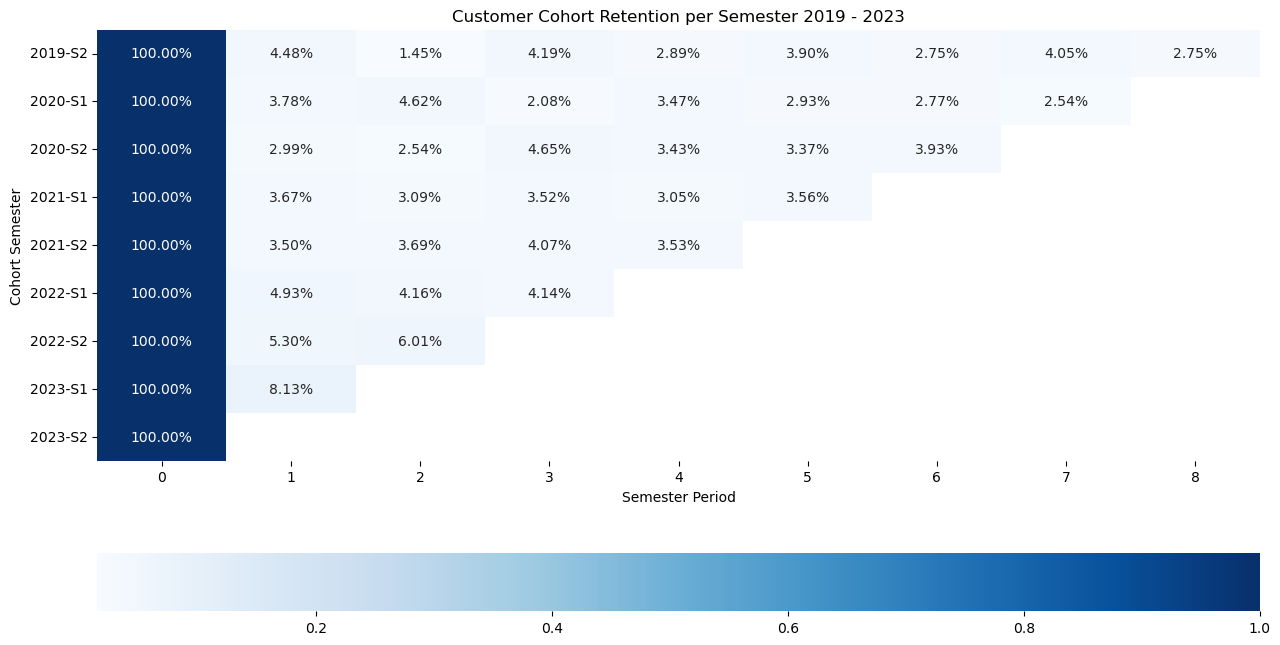

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(data=cohort_retention_rate,
            annot=True,
            fmt='.2%',
            cbar_kws={'orientation':'horizontal'},
            cmap='Blues')

plt.title('Customer Cohort Retention per Semester 2019 - 2023')
plt.xlabel('Semester Period')
plt.ylabel('Cohort Semester')
plt.show()

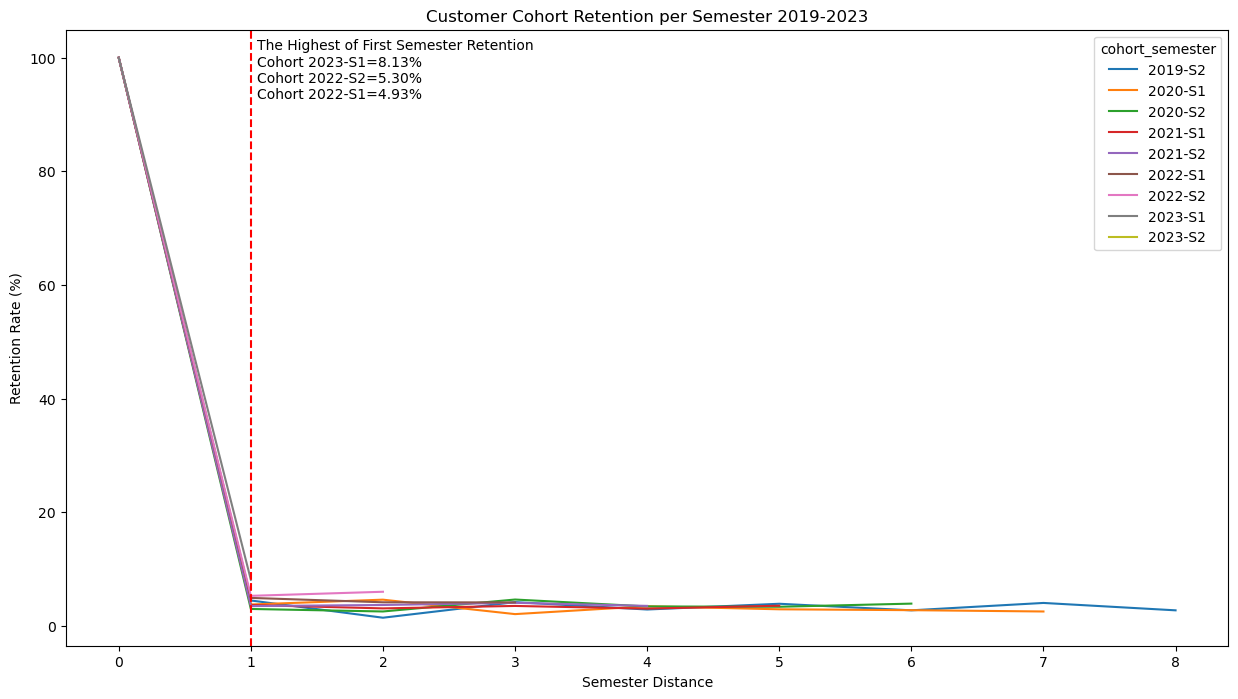

In [23]:
# Create lineplot
plt.figure(figsize=(15,8))

#cohort lineplot
sns.lineplot(data=cohort_retention, x='semester_distance', y='retention_rate', hue='cohort_semester')

#vertical line
plt.axvline(x=1, linestyle='--', color='red')

#anotasi
top_3 = cohort_retention[cohort_retention['semester_distance']==1].sort_values(by='retention_rate', ascending=False).head()
top_3_name = top_3['cohort_semester'].to_list()
top_3_percentage = top_3['retention_rate'].to_list()

#string anotasi
text=f'''
The Highest of First Semester Retention
Cohort {top_3_name[0]}={0.01*top_3_percentage[0]:.2%}
Cohort {top_3_name[1]}={0.01*top_3_percentage[1]:.2%}
Cohort {top_3_name[2]}={0.01*top_3_percentage[2]:.2%}
'''

plt.text(1.05, 90, text)

plt.xlabel('Semester Distance')
plt.ylabel('Retention Rate (%)')
plt.title('Customer Cohort Retention per Semester 2019-2023')
plt.show()

In [24]:
# Hitung user per cohort-semester-current-semester per country
df_country = (
    df.groupby(['cohort_semester', 'current_semester', 'country'])
    .agg({'user_id': 'nunique'})
    .reset_index()
    .rename(columns={'user_id': 'count_user'})
)
# Tambahkan semester_distance
df_country['semester_distance'] = (
    pd.to_numeric(df_country['current_semester'].str[-1]) -
    pd.to_numeric(df_country['cohort_semester'].str[-1]) +
    (pd.to_numeric(df_country['current_semester'].str[:4]) -
     pd.to_numeric(df_country['cohort_semester'].str[:4])) * 2
)

# Hitung total user di semester 0 per cohort per country
cohort_size = df_country[df_country['semester_distance'] == 0].groupby(['cohort_semester', 'country'])['count_user'].sum().reset_index().rename(columns={'count_user': 'total_users'})

# Gabung untuk dapatkan retention rate
df_country = df_country.merge(cohort_size, on=['cohort_semester', 'country'])
df_country['retention_rate'] = df_country['count_user'] / df_country['total_users'] * 100
df_country

,cohort_semester,current_semester,country,count_user,semester_distance,total_users,retention_rate
0,2019-S2,2019-S2,Australia,10,0,10,100.0
1,2019-S2,2019-S2,Belgium,7,0,7,100.0
2,2019-S2,2019-S2,Brasil,71,0,71,100.0
3,2019-S2,2019-S2,China,152,0,152,100.0
4,2019-S2,2019-S2,France,23,0,23,100.0
...,...,...,...,...,...,...,...
420,2023-S2,2023-S2,Poland,18,0,18,100.0
421,2023-S2,2023-S2,South Korea,388,0,388,100.0
422,2023-S2,2023-S2,Spain,341,0,341,100.0
423,2023-S2,2023-S2,United Kingdom,342,0,342,100.0


In [25]:
df_country.to_csv('cohort country.csv', index=False)

In [26]:
# Pivot
cohort_retention_pivot_country = df_country.pivot_table(
    index='cohort_semester',
    columns='semester_distance',
    values='count_user')

cohort_retention_pivot_country

semester_distance,0,1,2,3,4,5,6,7,8
cohort_semester,,,,,,,,,
2019-S2,39.416667,3.166667,1.166667,2.500000,2.600000,2.285714,1.833333,2.400000,5.0
2020-S1,67.538462,5.400000,3.900000,2.000000,2.888889,3.250000,4.500000,2.333333,NaN
2020-S2,102.916667,5.428571,4.428571,5.200000,3.900000,4.444444,4.400000,NaN,NaN
2021-S1,133.384615,6.000000,5.777778,6.800000,6.111111,6.444444,NaN,NaN,NaN
2021-S2,166.230769,8.100000,7.090909,8.090909,7.700000,NaN,NaN,NaN,NaN
2022-S1,234.833333,12.181818,11.181818,10.545455,NaN,NaN,NaN,NaN,NaN
2022-S2,310.500000,18.272727,19.181818,NaN,NaN,NaN,NaN,NaN,NaN
2023-S1,378.076923,31.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-S2,550.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# step 6
# retention rate
cohort_retention_rate_country = cohort_retention_pivot_country.divide(cohort_retention_pivot_country.iloc[:,0],axis=0)

cohort_retention_rate_country

semester_distance,0,1,2,3,4,5,6,7,8
cohort_semester,,,,,,,,,
2019-S2,1.0,0.080338,0.029598,0.063425,0.065962,0.057989,0.046512,0.060888,0.12685
2020-S1,1.0,0.079954,0.057745,0.029613,0.042774,0.048121,0.066629,0.034548,NaN
2020-S2,1.0,0.052747,0.043031,0.050526,0.037895,0.043185,0.042753,NaN,NaN
2021-S1,1.0,0.044983,0.043317,0.050980,0.045816,0.048315,NaN,NaN,NaN
2021-S2,1.0,0.048727,0.042657,0.048673,0.046321,NaN,NaN,NaN,NaN
2022-S1,1.0,0.051874,0.047616,0.044906,NaN,NaN,NaN,NaN,NaN
2022-S2,1.0,0.058849,0.061777,NaN,NaN,NaN,NaN,NaN,NaN
2023-S1,1.0,0.082655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-S2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
cohort_retention_rate_country.to_csv('retention rate country.csv', index=False)

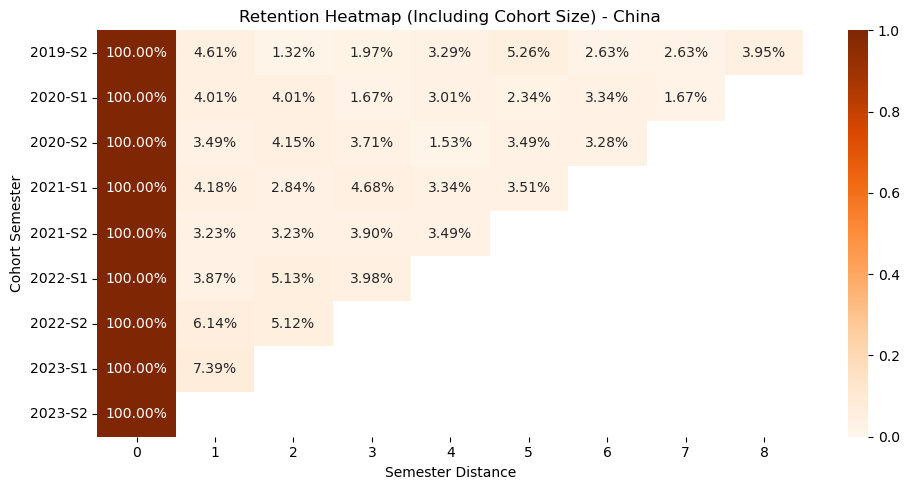

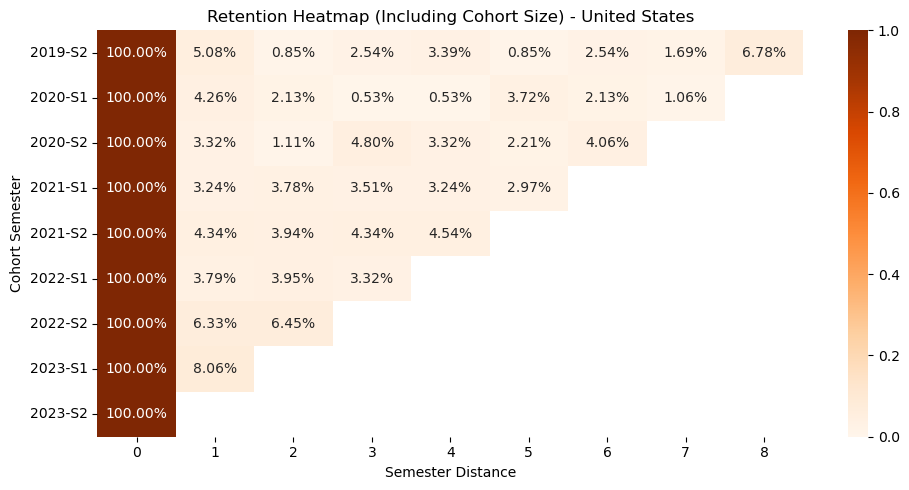

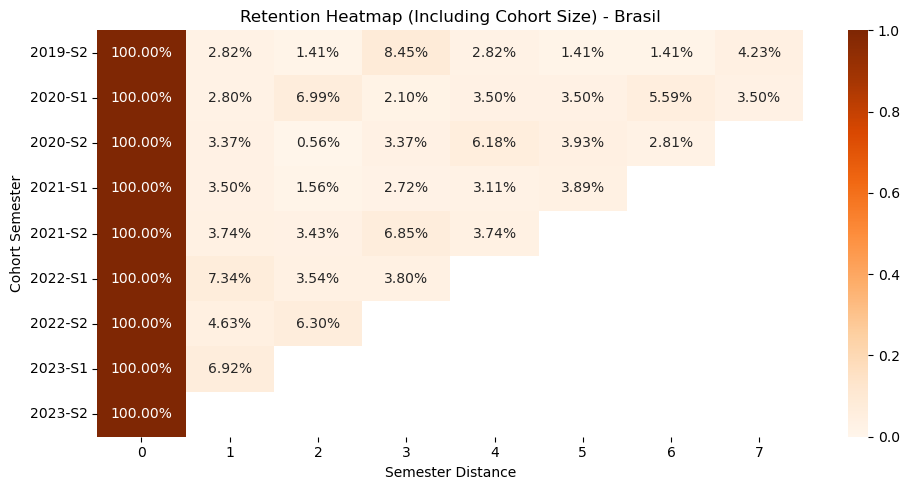

In [29]:
top_countries = df_country['country'].value_counts().head(3).index.tolist()

i = 0
for country in top_countries:
    # Filter data untuk negara tertentu (termasuk semester 0)
    subset = df_country[(df_country['country'] == country) & (df_country['semester_distance'] >= 0)].copy()
    
    # Hitung cohort size (semester 0)
    cohort_size = (
        subset[subset['semester_distance'] == 0]
        .groupby('cohort_semester')['count_user']
        .sum()
        .reset_index()
        .rename(columns={'count_user': 'cohort_size'})
    )
    
    # Gabungkan cohort_size dengan data retained (semester >= 0)
    merged = subset.merge(cohort_size, on='cohort_semester', how='left')
    merged['retention_rate'] = merged['count_user'] / merged['cohort_size']
    
    # Buat pivot table (termasuk semester 0)
    pivot = merged.pivot_table(
        index='cohort_semester',
        columns='semester_distance',
        values='retention_rate',
        aggfunc='mean'
    )
    pivot.to_csv(f'TheOnlyOne{i}.csv')
    i += 1
    # Urutkan kolom dari semester 0
    pivot = pivot[sorted(pivot.columns)]
    
    # Plot heatmap
    plt.figure(figsize=(10, 5))
    sns.heatmap(pivot, annot=True, fmt=".2%", cmap='Oranges', vmin=0, vmax=1)
    plt.title(f'Retention Heatmap (Including Cohort Size) - {country}')
    plt.xlabel('Semester Distance')
    plt.ylabel('Cohort Semester')
    plt.tight_layout()

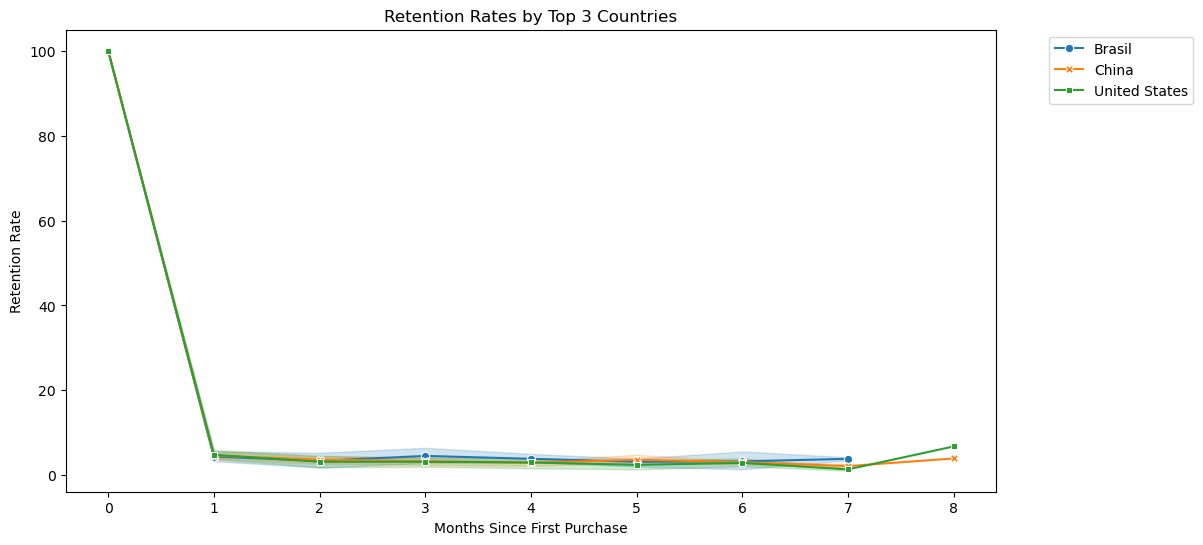

In [30]:
top_3_countries = df_country['country'].value_counts().head(3).index.tolist()
filtered_data = df_country[df_country['country'].isin(top_3_countries)]

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=filtered_data,
    x='semester_distance',
    y='retention_rate',
    hue='country',
    style='country',
    markers=True,
    dashes=False
)
plt.title('Retention Rates by Top 3 Countries')
plt.xlabel('Months Since First Purchase')
plt.ylabel('Retention Rate')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

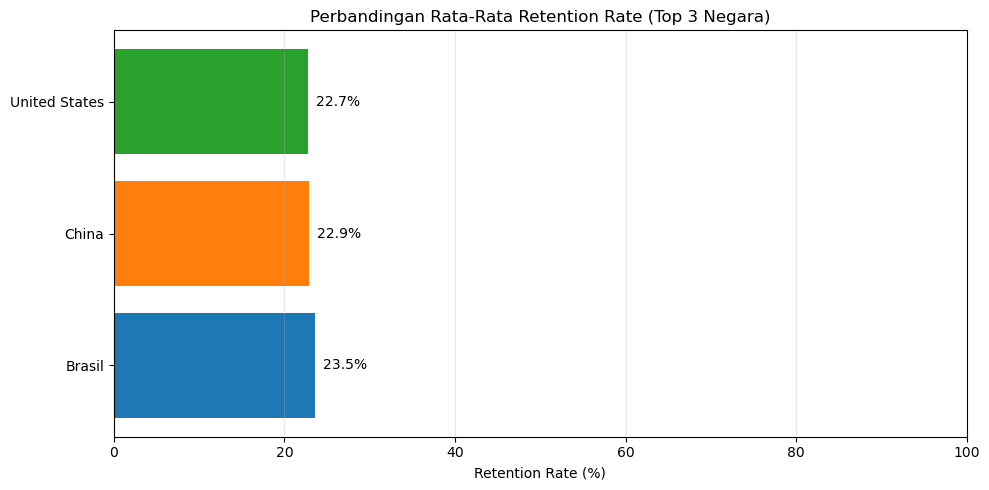

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Hitung rata-rata retensi per negara
avg_retention = filtered_data.groupby('country')['retention_rate'].mean().reset_index()

# 2. Ambil 3 negara teratas & urutkan
top_countries = avg_retention.sort_values('retention_rate', ascending=False).head(3)

# 4. Visualisasi
plt.figure(figsize=(10, 5))
plt.barh(top_countries['country'], top_countries['retention_rate'], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Perbandingan Rata-Rata Retention Rate (Top 3 Negara)')
plt.xlabel('Retention Rate (%)')
plt.xlim(0, 100)
plt.grid(axis='x', alpha=0.3)

# Tambah label persentase
for i, v in enumerate(top_countries['retention_rate']):
    plt.text(v + 1, i, f"{v:.1f}%", ha='left', va='center')

plt.tight_layout()
plt.show()

In [33]:
top_countries.to_csv('top countries.csv', index=False)